In [1]:
%matplotlib inline
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import SimpleITK as sitk
import tensorflow as tf
from sklearn import feature_extraction
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
def get_data(filename):
    img = nib.load(filename)
    return img.get_data(), img.affine
mri_data,affine = get_data('case_001_2.nii.gz')
labelled_data,_ = get_data('tumor.nii.gz')
shape = labelled_data.shape

In [3]:
slice_num = 25
slice_size = (24,20)
patches = feature_extraction.image.extract_patches_2d(mri_data[:,:,slice_num], slice_size)
patches = np.reshape(patches, (patches.shape[0],slice_size[0]*slice_size[1]))
#patches_output = feature_extraction.image.extract_patches_2d(labelled_data[:,:,slice_num], slice_size)
patches_output = labelled_data[12:shape[0]-11,10:shape[1]-9,slice_num]
patches_output = np.reshape(patches_output,[patches_output.size,1])
#patches.shape

In [14]:
patches.shape

(79765, 480)

In [6]:
model = Sequential()
model.add(Dense(12,input_dim=(slice_size[0]*slice_size[1])))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Dense(1))
model.add(Activation('relu'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy')
model.fit(patches,patches_output)

Epoch 1/10
79765/79765 [==============================] - 2s - loss: 0.8202     
Epoch 2/10
79765/79765 [==============================] - 3s - loss: 0.6918     
Epoch 3/10
79765/79765 [==============================] - 3s - loss: 0.6918     
Epoch 4/10
79765/79765 [==============================] - 3s - loss: 0.6918     
Epoch 5/10
79765/79765 [==============================] - 2s - loss: 0.6918     
Epoch 6/10
79765/79765 [==============================] - 2s - loss: 0.6918     
Epoch 7/10
79765/79765 [==============================] - 2s - loss: 0.6918     
Epoch 8/10
79765/79765 [==============================] - 2s - loss: 0.6918     
Epoch 9/10
79765/79765 [==============================] - 3s - loss: 0.6918     
Epoch 10/10
79765/79765 [==============================] - 3s - loss: 0.6918     



77760/79765 [============================>.] - ETA: 0s0.691792272935


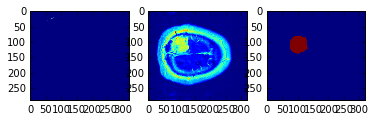

2533.3399291


In [60]:
slice_num2 = 29
patches2 = feature_extraction.image.extract_patches_2d(mri_data[:,:,slice_num2], slice_size)
patches2 = np.reshape(patches, (patches.shape[0],slice_size[0]*slice_size[1]))
#patches_output2 = feature_extraction.image.extract_patches_2d(labelled_data[:,:,slice_num2], slice_size)
patches_output2 = labelled_data[12:shape[0]-11,10:shape[1]-9,slice_num]
patches_output2 = np.reshape(patches_output2,[patches_output.size,1])
print '\n',model.evaluate(patches2,patches_output2)
predict = model.predict(patches2)
new_data=predict.reshape(shape[0]-24+1, shape[1]-20+1)
new_data = np.zeros(shape[:2])
new_data[12:shape[0]-11,10:shape[1]-9] = predict.reshape(shape[0]-24+1, shape[1]-20+1)

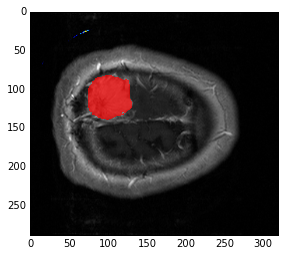

In [61]:
fig, ax = plt.subplots(1,1)

ax.imshow(mri_data[:,:,slice_num2],cmap=plt.cm.gray)
ax.imshow(np.ma.masked_where(labelled_data[:,:,slice_num2]==0, labelled_data[:,:,slice_num2]),alpha=.7,cmap=plt.cm.autumn, interpolation='none')
ax.imshow(np.ma.masked_where(new_data==0, new_data))

In [61]:
new_data=feature_extraction.image.reconstruct_from_patches_2d(predict,(288,320))

ValueError: operands could not be broadcast together with shapes (24,20,3) (24,20) (24,20,3) 

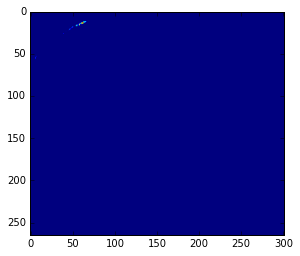

In [17]:
plt.imshow(new_data)

In [70]:
d=np.array([[ 0,  3,  6,  9],
       [12, 15, 18, 21],
       [24, 27, 30, 33],
       [36, 39, 42, 45]])
feature_extraction.image.extract_patches_2d(d, (2, 2))

array([[[ 0,  3],
        [12, 15]],

       [[ 3,  6],
        [15, 18]],

       [[ 6,  9],
        [18, 21]],

       [[12, 15],
        [24, 27]],

       [[15, 18],
        [27, 30]],

       [[18, 21],
        [30, 33]],

       [[24, 27],
        [36, 39]],

       [[27, 30],
        [39, 42]],

       [[30, 33],
        [42, 45]]])